# Install and import libraries

In [22]:
# Install libraries
!pip install -q missingno
!pip install -q pyod

# import libraries
import missingno as msno
import pandas as pd
from pyod.models.knn import KNN

# Importing the dataset

In [8]:
# Read the dataset
dataset_path = "C:\My\Top-up Degree\Data Science\Data Science - Assignment\Data set\Kaggle\Our World in Data - COVID-19\owid-covid-data.csv"
data = pd.read_csv(dataset_path)
print("Shape before dropping columns:", data.shape)
display(data.head(n=5))

Shape before dropping columns: (330782, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN


## Describing the dataset

In [11]:
data.describe() # print the descriptive statistics

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.933000e+05,3.216330e+05,3.203740e+05,2.721740e+05,321702.000000,320472.000000,293300.000000,321633.000000,320374.000000,272174.000000,...,189702.000000,125583.000000,226326.000000,304234.000000,248529.000000,3.307820e+05,1.153500e+04,11535.000000,11535.000000,11535.000000
mean,6.253904e+06,1.013110e+04,1.016799e+04,8.357613e+04,91.896227,92.240686,95300.478343,153.109948,153.681658,843.644772,...,32.910416,50.790677,3.097145,73.716225,0.722483,1.282799e+08,4.933200e+04,9.635586,11.815644,1591.662698
std,3.854149e+07,1.134175e+05,9.718695e+04,4.293215e+05,761.899876,597.590018,145463.270075,1196.206835,616.176235,1079.976631,...,13.574225,31.956510,2.548339,7.396354,0.148987,6.602098e+08,1.412464e+05,12.479665,25.623475,1894.037851
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2142.340300
25%,7.474000e+03,0.000000e+00,5.710000e-01,1.250000e+02,0.000000,0.000000,2273.895000,0.000000,0.120000,55.469500,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,7.479999e+01,1.070000,-1.495000,46.896362
50%,6.538100e+04,4.000000e+00,3.007150e+01,1.250000e+03,0.000000,0.143000,24535.964500,0.366000,8.249000,358.698000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.352899e+03,7.960000,6.020000,1021.922500
75%,6.940385e+05,3.160000e+02,5.622860e+02,1.116475e+04,3.000000,5.857000,122228.212250,41.737000,92.141750,1298.258000,...,41.300000,83.241000,4.200000,79.460000,0.829000,2.830170e+07,3.510710e+04,15.370000,16.920000,2615.629150
max,7.689823e+08,8.401763e+06,6.402721e+06,6.953730e+06,121590.000000,18214.143000,737554.506000,228872.025000,37241.781000,6501.224000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.281224e+06,76.550000,377.430000,10292.468000


In [12]:
import pandas as pd
pd.options.display.float_format = ' {:.2f}'.format # set the format for two decimal places
data.describe() # print the descriptive statistics

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,293300.00,321633.00,320374.00,272174.00,321702.00,320472.00,293300.00,321633.00,320374.00,272174.00,...,189702.00,125583.00,226326.00,304234.00,248529.00,330782.00,11535.00,11535.00,11535.00,11535.00
mean,6253904.17,10131.10,10167.99,83576.13,91.90,92.24,95300.48,153.11,153.68,843.64,...,32.91,50.79,3.10,73.72,0.72,128279905.10,49332.00,9.64,11.82,1591.66
std,38541489.37,113417.45,97186.95,429321.51,761.90,597.59,145463.27,1196.21,616.18,1079.98,...,13.57,31.96,2.55,7.40,0.15,660209762.20,141246.42,12.48,25.62,1894.04
min,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.70,1.19,0.10,53.28,0.39,47.00,-37726.10,-44.23,-95.92,-2142.34
25%,7474.00,0.00,0.57,125.00,0.00,0.00,2273.89,0.00,0.12,55.47,...,22.60,20.86,1.30,69.59,0.60,449002.00,74.80,1.07,-1.50,46.90
50%,65381.00,4.00,30.07,1250.00,0.00,0.14,24535.96,0.37,8.25,358.70,...,33.10,49.84,2.50,75.05,0.74,5882259.00,5352.90,7.96,6.02,1021.92
75%,694038.50,316.00,562.29,11164.75,3.00,5.86,122228.21,41.74,92.14,1298.26,...,41.30,83.24,4.20,79.46,0.83,28301700.00,35107.10,15.37,16.92,2615.63
max,768982331.00,8401763.00,6402720.57,6953730.00,121590.00,18214.14,737554.51,228872.02,37241.78,6501.22,...,78.10,100.00,13.80,86.75,0.96,7975105024.00,1281224.50,76.55,377.43,10292.47


In [41]:
dates = ("2023-01-01", "2023-08-01")
# Convert the date column of the full_df to datetime format
data['date'] = pd.to_datetime(data['date'])
# Filter the full_df by the date range using boolean indexing
df = data[(data['date'] >= dates[0]) & (data['date'] <= dates[1])]

In [32]:
df.shape

(53733, 67)

## Dataset information

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53733 entries, 1094 to 330780
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    53733 non-null  object        
 1   continent                                   51177 non-null  object        
 2   location                                    53733 non-null  object        
 3   date                                        53733 non-null  datetime64[ns]
 4   total_cases                                 51972 non-null  float64       
 5   new_cases                                   52338 non-null  float64       
 6   new_cases_smoothed                          52338 non-null  float64       
 7   total_deaths                                50526 non-null  float64       
 8   new_deaths                                  52367 non-null  float64       
 9   ne

## Checking missing values

<Axes: >

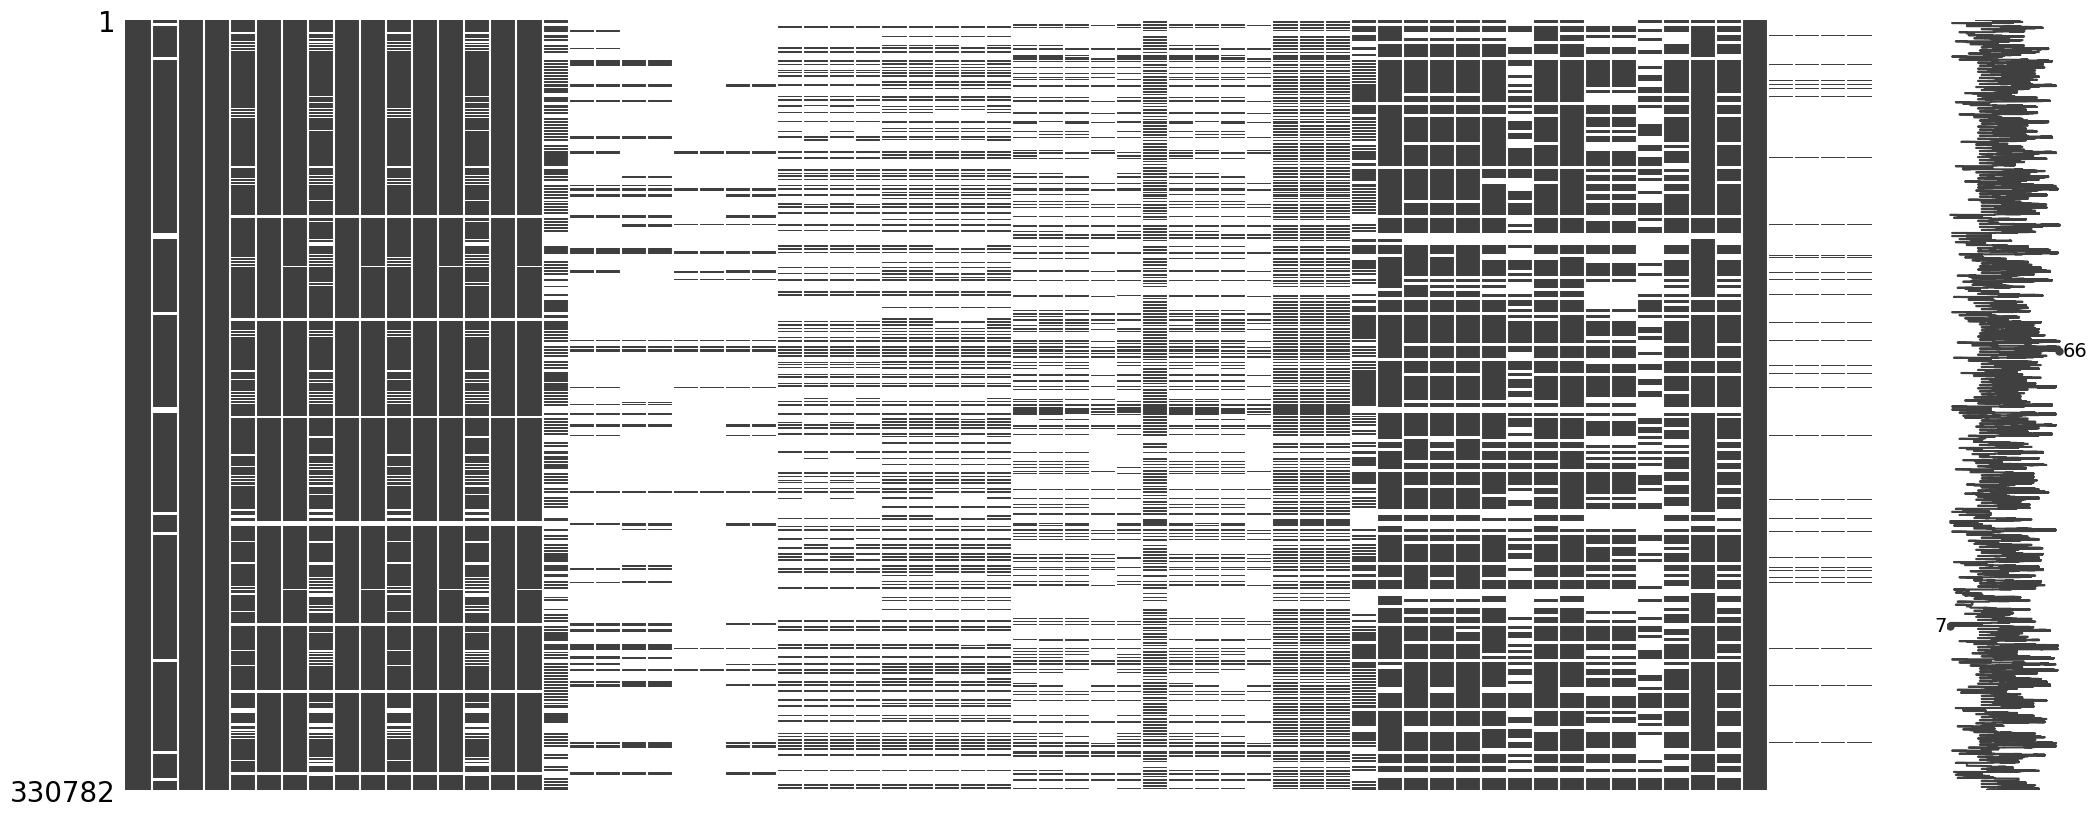

In [35]:
# Plot the missing values matrix
msno.matrix(data)

In [40]:
# Import pandas as pd
import pandas as pd

# Import display from IPython.display
from IPython.display import display

# Calculate the missing data ratio for each column as percentages
missing_data_ratio = data.isnull().mean() * 100

# Convert the Series to a DataFrame for better display
missing_data_df = pd.DataFrame({'Missing Data Ratio (%)': missing_data_ratio})

# Display the missing data ratio for each column as percentages in a scrollable DataFrame
with pd.option_context('display.max_rows', None):
    display(missing_data_df)

,Missing Data Ratio (%)
iso_code,0.00
continent,4.75
location,0.00
date,0.00
total_cases,11.33
new_cases,2.77
new_cases_smoothed,3.15
total_deaths,17.72
new_deaths,2.75
new_deaths_smoothed,3.12


## Checking outliers

In [42]:
import pandas as pd

# Load your dataset (assuming you already have 'data' DataFrame)
df = data.copy()

# Define the column to check for outliers
column_name = 'total_cases'
column_data = df[column_name]

# Calculate Z-scores for the 'total_cases' column
z_scores = (column_data - column_data.mean()) / column_data.std()

# Define the threshold for Z-score to identify outliers
threshold = 3

# Identify outliers based on the absolute Z-scores exceeding the threshold
outliers = df[abs(z_scores) > threshold]

# Print the outliers
print("Outliers:")
display(outliers)

Outliers:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
16498,OWID_ASI,NaN,Asia,2022-03-08,122507617.00,791293.00,706920.57,1365917.00,1917.00,1951.86,...,NaN,NaN,NaN,NaN,NaN,4721383370.00,NaN,NaN,NaN,NaN
16499,OWID_ASI,NaN,Asia,2022-03-09,123354783.00,847166.00,727234.14,1367885.00,1968.00,1926.00,...,NaN,NaN,NaN,NaN,NaN,4721383370.00,NaN,NaN,NaN,NaN
16500,OWID_ASI,NaN,Asia,2022-03-10,124101007.00,746224.00,721573.14,1369710.00,1825.00,1916.57,...,NaN,NaN,NaN,NaN,NaN,4721383370.00,NaN,NaN,NaN,NaN
16501,OWID_ASI,NaN,Asia,2022-03-11,124898209.00,797202.00,730206.43,1371566.00,1856.00,1864.14,...,NaN,NaN,NaN,NaN,NaN,4721383370.00,NaN,NaN,NaN,NaN
16502,OWID_ASI,NaN,Asia,2022-03-12,125930442.00,1032233.00,775388.00,1373481.00,1915.00,1848.57,...,NaN,NaN,NaN,NaN,NaN,4721383370.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326850,OWID_WRL,NaN,World,2023-07-29,768632837.00,694.00,46823.57,6953094.00,11.00,75.00,...,34.63,60.13,2.71,72.58,0.74,7975105024.00,NaN,NaN,NaN,NaN
326851,OWID_WRL,NaN,World,2023-07-30,768654204.00,21367.00,45918.43,6953470.00,376.00,87.00,...,34.63,60.13,2.71,72.58,0.74,7975105024.00,NaN,NaN,NaN,NaN
326852,OWID_WRL,NaN,World,2023-07-31,768978837.00,324633.00,50862.86,6953676.00,206.00,97.29,...,34.63,60.13,2.71,72.58,0.74,7975105024.00,NaN,NaN,NaN,NaN
326853,OWID_WRL,NaN,World,2023-08-01,768982331.00,3494.00,50703.29,6953730.00,54.00,97.00,...,34.63,60.13,2.71,72.58,0.74,7975105024.00,NaN,NaN,NaN,NaN
